In [10]:
%pip install statsmodels
%pip install mplfinance
%pip install scikit-learn

from datetime import datetime
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from pandas.plotting import autocorrelation_plot

import pandas as pd
import matplotlib.pyplot as plt
import math
import mplfinance as mpf


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [11]:
# Load data
path = 'data/technology/SAM.csv'
df = pd.read_csv(path, index_col=6, delimiter='\t')
# Get training data (timely ordered since data is time-series)
n = int(len(df) * 0.6)
m = int(len(df) * 0.8)

df

,Unnamed: 0,Open,High,Low,Close,Volume,Code
TradingDate,,,,,,,
2001-01-03,0,1424.0,1424.0,1424.0,1424.0,24700,SAM
2001-01-05,1,1449.0,1449.0,1449.0,1449.0,40300,SAM
2001-01-08,2,1474.0,1474.0,1474.0,1474.0,39500,SAM
2001-01-10,3,1504.0,1504.0,1504.0,1504.0,146200,SAM
2001-01-12,4,1533.0,1533.0,1533.0,1533.0,180600,SAM
...,...,...,...,...,...,...,...
2023-05-04,5453,6100.0,6120.0,6020.0,6090.0,417873,SAM
2023-05-05,5454,6100.0,6390.0,6100.0,6300.0,1909885,SAM
2023-05-08,5455,6420.0,6490.0,6340.0,6470.0,1543364,SAM


In [12]:
Close=df['Close'].values
df_train, train_close = df.head(n), Close[:n]
df_validation, val_close = df[n:m], Close[n:m]
df_test, test_close = df[:m], Close[m:] 

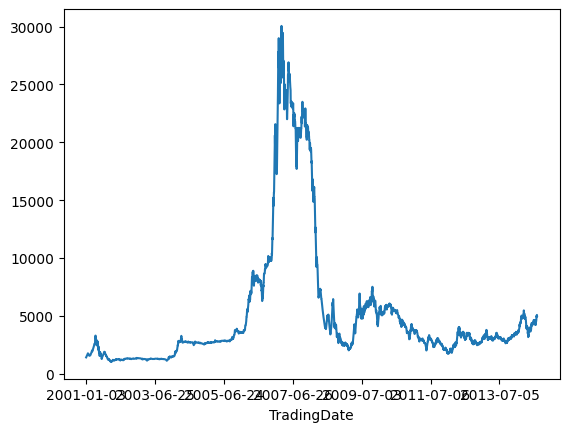

In [13]:
# visual training data
df_train['Close'].plot()
plt.show()

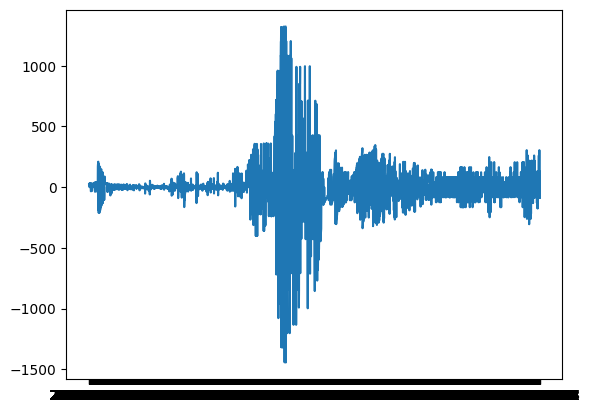

In [14]:
plt.plot(df_train['Close'].diff())

<function matplotlib.pyplot.show(close=None, block=None)>

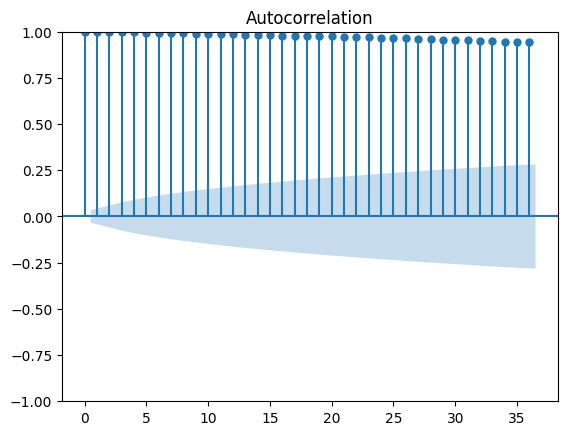

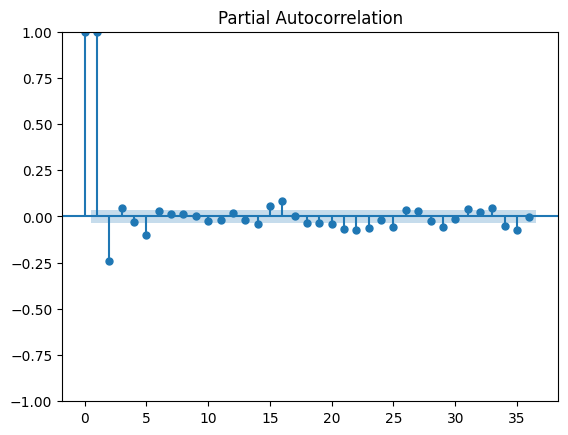

In [15]:
plot_acf(df_train['Close'])
plot_pacf(df_train['Close'])
plt.show

**ARIMA MODEL**

In [16]:
history=[x for x in train_close]
preds=[]
for i in range(len(test_close)):
    model = ARIMA(history, order=(3, 1, 5))
    model_fit = model.fit()
    output = model_fit.forecast()
    pred = output[0]
    preds.append(pred)
    history.append(test_close[i])

In [17]:
# evaluate forecasts
rmse = math.sqrt(mean_squared_error(test_close, preds))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 352.857


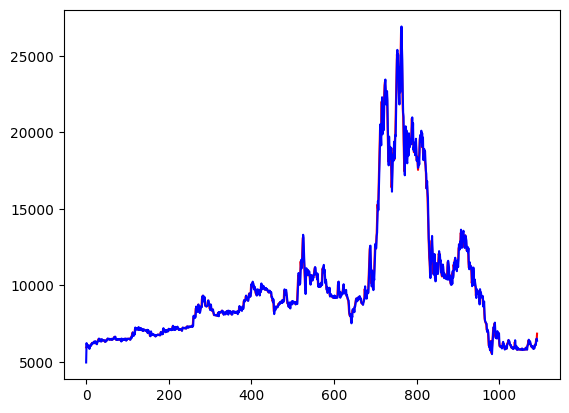

In [18]:
plt.plot(test_close, color='red')
plt.plot(preds, color='blue')
